In [2]:
#Librerias básicas
#================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import duckdb
import glob

# Configuración para machine learning
# ================================================================================
import tensorflow as tf
import tensorflow.keras as keras
from pandas.core.frame import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import multiprocessing

import cv2

# Activar SQL en Python
# ================================================================================
con = duckdb.connect(database=':memory:')

In [82]:
#Url Ari 
url_lcc    = "C:/Users/ASUS/OneDrive/Documentos/2023-2/Inteligencia/Proyecto/Exoplanet-detection-with-Neural-Network/Curvas_de_luz_cor/"
url_lc_img = "C:/Users/ASUS/OneDrive/Documentos/2023-2/Inteligencia/Proyecto/Curvas_de_luz_img/"
url        = "C:/Users/ASUS/OneDrive/Documentos/2023-2/Inteligencia/Proyecto/Exoplanet-detection-with-Neural-Network/"

In [3]:
#Urls Pater
url_lcc    = "/home/pater/Desktop/CosasPater/UNAL/2023-02NovenoSemestre/Exoplanet-detection-with-Neural-Network/Curvas_de_luz_cor/"
url_lc_img = "/home/pater/Desktop/CosasPater/UNAL/2023-02NovenoSemestre/ClassificationExoplanets/Curvas_de_luz_img/" 
url        = "/home/pater/Desktop/CosasPater/UNAL/2023-02NovenoSemestre/Exoplanet-detection-with-Neural-Network/"

## Creación de las imagenes

In [4]:
Carac_Stars = pd.read_csv(url+"Carac_Stars.csv")
Carac_Stars

,Kepler_ID,Metalicidad,Clasificacion,incert_clas
0,10797460,0.136,CANDIDATE,1.000
1,10811496,-0.127,FALSE POSITIVE,0.000
2,10848459,-0.522,FALSE POSITIVE,0.000
3,10854555,0.081,CANDIDATE,1.000
4,10872983,-0.067,CANDIDATE,0.992
...,...,...,...,...
7677,10128825,-0.046,CANDIDATE,0.497
7678,10147276,-0.038,FALSE POSITIVE,0.021
7679,10156110,0.082,FALSE POSITIVE,0.000
7680,8460634,-0.556,FALSE POSITIVE,0.000


In [5]:
arch = os.listdir(url_lcc) 
arch.sort()
Stars_list = [star[3:-4] for star in arch]

s_flux  = []
s_err   = []
Id_real = []
for Str in arch:
    serie = pd.read_csv(url_lcc+Str).set_index('time')
    s_flux.append(np.array(serie['flux']))
    s_err.append(np.array(serie['flux_err']))
    Id_real.append(Str[3:-4])


In [6]:
Stars = pd.DataFrame()
Stars["ID"] = Id_real
Stars

,ID
0,10000162
1,10000941
2,10001368
3,10002049
4,10002266
...,...
7677,9993683
7678,9994381
7679,9995402
7680,9995771


In [7]:
Clas_Stars = con.execute("""select S.ID, case when C.Clasificacion == 'CANDIDATE' then 1 
                                              else 0             
                                         end as ClasBin
                            from Carac_Stars C inner join Stars S on (S.ID = C.Kepler_ID)
                            order by S.ID""").df()
Clas_Stars

,ID,ClasBin
0,10000162,1
1,10000941,1
2,10001368,1
3,10002049,1
4,10002266,0
...,...,...
7677,9993683,1
7678,9994381,1
7679,9995402,1
7680,9995771,1


In [8]:
#Obtención de las imagenes ya existentes en la carpeta
contenido = os.listdir(url_lc_img)
L_Str = []
for Str in contenido:
    Str = Str[4:-4]
    L_Str.append(Str)

In [21]:
#Se descargan las curvas de luz no existentes
KEPID = list(Stars['ID'])
i = 0
for name in KEPID:
    if name in L_Str:
        i += 1
        continue
    else:
        j = KEPID.index(name)
        name = int(name)
        plt.figure(figsize=(8,4))
        plt.plot(s_flux[j],color="#000000")
        plt.axis('off')
        plt.savefig(f"{url_lc_img}Img_{name}", dpi=72, bbox_inches='tight')
        continue

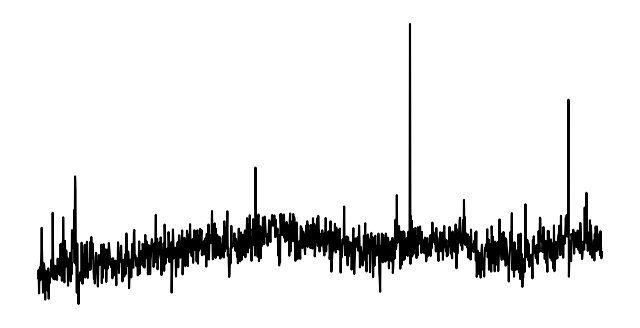

In [9]:
j = 300
name = "Prueba"
plt.figure(figsize=(8,4))
plt.plot(s_flux[j],color="#000000")
plt.axis('off')
plt.savefig(f"{url_lc_img}Img_{name}", dpi=72, bbox_inches='tight')

## División conjuntos train, validation, test

In [6]:
contenido = os.listdir(url_lc_img)
Img_LC = []
i = 0
for img in contenido:
    i += 1
    #Se obtienen las imagenes normalizadas en escala de grises
    Img = cv2.imread(url_lc_img+img,cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
    Img_LC.append(Img)

In [8]:
for i in range(len(Img_LC)):
    print(Img_LC[i].shape)
len(Img_LC)    

(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)
(236, 460)

1174

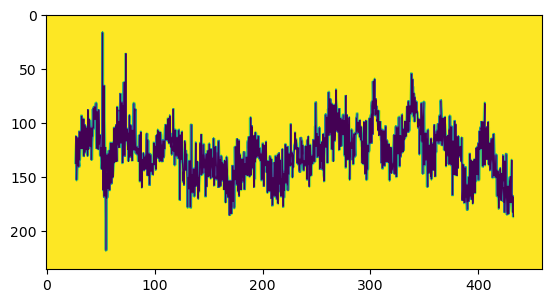

In [11]:
plt.imshow(Img_LC[78])
plt.show()

In [12]:
Img_LC[78]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [24]:


X_train, X_test, y_train, y_test = train_test_split(np.array(Img_LC), 
                                                    np.array(Clas_Stars["ClasBin"]),
                                                    test_size=0.3)

X_val,  X_test,  y_val,  y_test  = train_test_split(X_test, 
                                                    y_test,
                                                    test_size=0.333)

#X_train = X_train.reshape((len(X_train), 1285, 1))
#X_test  = X_test.reshape((len(X_test), 1285, 1))
#X_val   = X_val.reshape((len(X_val), 1285, 1))

print("Tamaño de entrenamiento:",X_train.shape,
      "\nTamaño de validacion:",X_val.shape,
      "\nTamaño de prueba:", X_test.shape,
      "\nDatos totales:",len(X_train)+len(X_val)+len(X_test))

MemoryError: Unable to allocate 36.6 GiB for an array with shape (7681, 400, 1600) and data type float64